In [69]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prem\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

In [140]:
df = pd.read_csv('Data Analyst - Test Data.csv')

In [141]:
df

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America


In [142]:
df.shape

(6448, 3)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [144]:
df['Location'].isnull().sum()

4737

In [145]:
df['Location'].value_counts()

United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
                           ... 
Halifax, N.S.                 1
State College, PA             1
Los ángeles , us              1
Stroudsburg Pa US             1
Trinidad and Tobago           1
Name: Location, Length: 1082, dtype: int64

In [146]:
df['Review'] = df['Review'].str.replace('\n','')

In [147]:
df

,Review,date,Location
0,I was very impressed with the resort. Great st...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor
...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great. ·the bed was the ...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America


In [148]:
df['Review'] = df['Review'].astype(str)

In [ ]:
1. PREDICTING SENTIMENT SCORE

In [149]:
analyzer = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [150]:
df

,Review,date,Location,sentiment_score
0,I was very impressed with the resort. Great st...,2019/08/20,Sebastian,0.9421
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,0.8360
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,0.6588
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN,0.3634
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,0.9260
...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America,0.9716
6444,·the internet barely worked or didn't work,2019/07/12,United States of America,0.0000
6445,·the location was great. ·the bed was the ...,2019/07/10,United States of America,0.2975
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America,0.0000


In [ ]:
2. MONTHLY REVIEW FREQUENCY

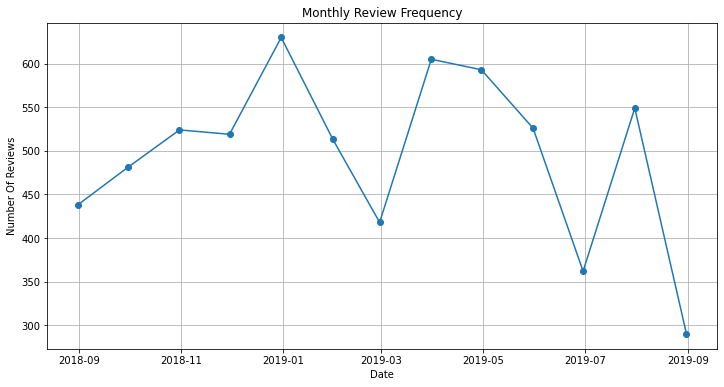

In [151]:
df['date']=pd.to_datetime(df['date'])
review_frequency = df.resample('M',on='date').size()
plt.figure(figsize=(12,6))
plt.plot(review_frequency.index,review_frequency.values,marker='o',linestyle='-')
plt.title('Monthly Review Frequency')
plt.xlabel('Date')
plt.ylabel('Number Of Reviews')
plt.grid(True)
plt.show()

In [ ]:
3. LOCATION BASED INSIGHTS

In [152]:
location_sentiment = df.groupby('Location')['sentiment_score'].mean()
print(location_sentiment)

Location
2186                                           0.4404
Aalborg, Denmark                               0.8750
Abbotsford BC                                  0.5859
Agde                                           0.0000
Aguadilla, P.R.                               -0.2960
                                                ...  
warwick ny                                     0.5267
wyndham garden silicon valley ,san jose ca.   -0.2755
yakima wa                                      0.9231
大阪                                             0.0000
東京                                             0.0000
Name: sentiment_score, Length: 1082, dtype: float64


In [ ]:
4. TOPIC MODELING

In [153]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Review'])

lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

for topic_idx, topic in enumerate(lda.components_):
 top_words_idx = topic.argsort()[:-10:-1]
 top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
 print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Topic 1: read, die, und, hotel, das, sehr, ist, et, zimmer
Topic 2: read, hotel, staff, great, location, stay, clean, room, friendly
Topic 3: read, room, hotel, nice, clean, good, rooms, location, great
Topic 4: room, read, check, hotel, desk, night, didn, did, bed
Topic 5: read, la, square, hotel, el, empire, en, que, state


In [154]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import pandas as pd
# Preprocess the text data
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
 words = text.split() # You can split text into words instead of using NLTK's word_tokenize
 words = [word.lower() for word in words if word.isalpha() and word.lower() not in
 stop_words]
 return words
df['processed_review'] = df['Review'].apply(preprocess_text)
# Create a dictionary and a corpus
dictionary = corpora.Dictionary(df['processed_review'])
corpus = [dictionary.doc2bow(text) for text in df['processed_review']]
# Define the number of topics to explore
num_topics = 5
# Tune LDA parameters
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15,
random_state=42)
# Calculate topic coherence
coherence_model = CoherenceModel(model=lda_model,
texts=df['processed_review'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Topic Coherence Score: {coherence_score}')
# Print topics
topics = lda_model.print_topics(num_words=10)
for topic in topics:
 print(topic)

Topic Coherence Score: 0.524648861216565
(0, '0.044*"read" + 0.022*"less" + 0.011*"springs" + 0.011*"disney" + 0.007*"e" + 0.005*"gorgeous" + 0.004*"cafe" + 0.004*"exceeded" + 0.004*"per" + 0.004*"la"')
(1, '0.072*"read" + 0.036*"less" + 0.027*"hotel" + 0.023*"great" + 0.021*"staff" + 0.016*"location" + 0.015*"room" + 0.013*"nice" + 0.012*"stay" + 0.012*"good"')
(2, '0.043*"read" + 0.022*"less" + 0.014*"de" + 0.009*"die" + 0.009*"hotel" + 0.008*"und" + 0.007*"das" + 0.006*"en" + 0.006*"et" + 0.006*"sehr"')
(3, '0.040*"read" + 0.035*"room" + 0.021*"less" + 0.012*"hotel" + 0.008*"one" + 0.008*"front" + 0.008*"desk" + 0.007*"like" + 0.007*"check" + 0.007*"us"')
(4, '0.038*"read" + 0.019*"less" + 0.017*"de" + 0.017*"la" + 0.015*"el" + 0.013*"que" + 0.012*"muy" + 0.011*"hotel" + 0.010*"en" + 0.007*"las"')


In [ ]:
5. DISTRIBUTION OF REVIEW SENTIMENTS

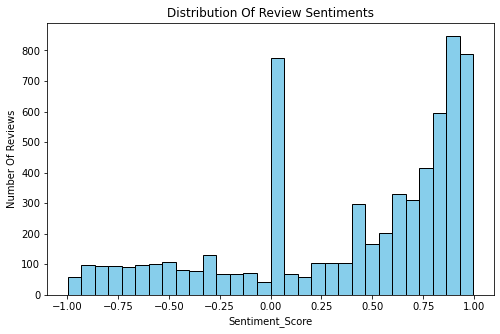

In [155]:
sentiment_scores = df['sentiment_score']

plt.figure(figsize=(8,5))
plt.hist(sentiment_scores,bins=30,color='skyblue',edgecolor='black')
plt.title('Distribution Of Review Sentiments')
plt.xlabel('Sentiment_Score')
plt.ylabel('Number Of Reviews')
plt.show()